In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision.io import read_image
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
import torch.nn as nn
import context
from diffusion_models.models import ForwardDiffusion

In [2]:
img = "/Users/lionelpeer/Pictures/2020/Japan/darktable_exported/DSC_1808.jpg"
img2 = "/Users/lionelpeer/Pictures/2020/Japan/DSC_1390.JPG"
img = read_image(img) / 255
img2 = read_image(img2) / 255
batch = torch.cat([img.unsqueeze(0), img.unsqueeze(0)], dim=0)

In [3]:
device = torch.device("mps")

noiser = ForwardDiffusion(timesteps=5000, device=device)

In [4]:
noisies = [noiser.forward(batch[0], i*500).cpu().permute(1,2,0) for i in range(7)]

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [23]:
blub = [r"$x_{} \sim p(x_{})$".format("{"+str(0)+"}", "{"+str(0)+"}")]
titles = [
    r"$x_{} \sim p(x_{}\mid x_{})$".format("{"+str(i)+"}", "{"+str(i)+"}", "{"+str(i-1)+"}") for i in [j*500 for j in range(1, 7)]
]
blub.extend(titles)

In [24]:
len(noisies), len(blub)

(7, 7)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/var/folders/h9/96x2b9pn2_v_xfb0gsxn97mw0000gn/T/ipykernel_67974/1882078798.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


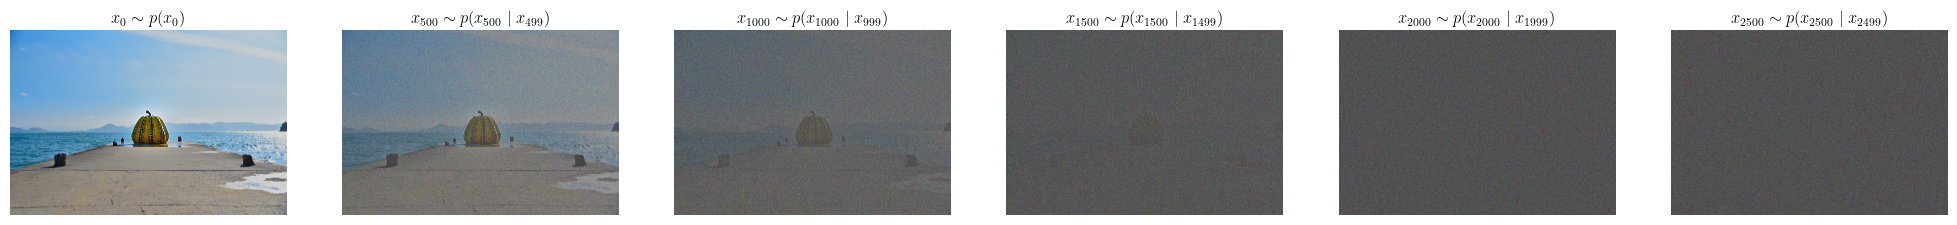

In [25]:
fig, ax = plt.subplots(1,6,figsize=(25,5))
for i, (elem, title) in enumerate(zip(noisies[:-1], blub[:-1])):
    ax[i].imshow(elem)
    ax[i].axis("off")
    ax[i].set_title(title)
fig.show()

In [26]:
fig.savefig("/Users/lionelpeer/Documents/Development/diffusionmodels/thesis/img/forward_naoshima.png")